In [2]:
# EGRIP Surface Transect isotopes 2018

import pandas as pd # for data handling
import numpy as np # for mathematical operations
import datetime as dt # for working with dates
%matplotlib inline
import matplotlib.pyplot as plt # for plotting
from loadandconvert import exportdf,deltatogas,removeoutliers,lscatter, plot1
import pickle
import csv
pd.set_option('display.max_columns', 20)

In [17]:
# import data
weather=pd.read_csv('/Users/swa048/forServer/Meteo/Ambient/2018/EGRIP/Weather_info_EGRIP18.csv',index_col=(0),parse_dates=True,infer_datetime_format=True,na_values=['Nan'],skiprows=[0],usecols=np.arange(9)) #
with open('/Users/swa048/Documents/OneDrive/Dokumente/EC/Isoflux/snowiso_model/weather_obs2018.pkl', 'wb') as f:
    pickle.dump(weather, f)

# import ST samples
dfST_05=pd.read_csv('/Users/swa048/forServer/Snow/Isotopes/2018/data_measuredsamples/ST/ST_05cm.txt',index_col=0,parse_dates=True,na_values=['NAN'])
dfST_1=pd.read_csv('/Users/swa048/forServer/Snow/Isotopes/2018/data_measuredsamples/ST/ST_1cm.txt',index_col=0,parse_dates=True,na_values=['NAN'])
dfST_2=pd.read_csv('/Users/swa048/forServer/Snow/Isotopes/2018/data_measuredsamples/ST/ST_2cm.txt',index_col=0,parse_dates=True,na_values=['NAN'])


dfPRECIP=pd.read_csv('/Users/swa048/forServer/Snow/Isotopes/2018/data_measuredsamples/PRECIP/PRECIP_sorted.txt',index_col=0,parse_dates=True,na_values=['NAN'],delim_whitespace=True)



ipath='/Users/swa048/Documents/OneDrive/Dokumente/EC/Isoflux/snowiso_model/weather_obs2018.pkl'
with open(ipath, 'rb') as f:
    dfweather=pickle.load(f)  
    
# import vapor 05 data
#iso7m=pd.read_csv('/Users/swa048/forServer/Vapour/2018/processed_data_combined/EG18_level7m.txt',index_col=0,parse_dates=True,na_values=['NAN'])  #7m?
iso30=pd.read_csv('/Users/swa048/forServer/Vapour/2018/processed_data_combined/EG18_level30cm.txt',index_col=0,parse_dates=True,na_values=['NAN'])  
#iso80=pd.read_csv('/Users/swa048/forServer/Vapour/2018/processed_data_combined/EG18_level80cm.txt',index_col=0,parse_dates=True,na_values=['NAN'])
iso180=pd.read_csv('/Users/swa048/forServer/Vapour/2018/processed_data_combined/EG18_level180cm.txt',index_col=0,parse_dates=True,na_values=['NAN'])
df03m_d=iso30.resample('1D').mean()
df2m_d=iso180.resample('1D').mean()


In [43]:
# NEW IMPORT
# import the ST data new.. because in the very early version of loading, I did somethign wrong ... (/Users/swa048/Documents/OneDrive/Dokumente/Python/ISO EGRIP 2018/ST_samples.py)
path='/Users/swa048/forServer/Snow/Isotopes/2018/data_measuredsamples/ST/ST_EGRIP_2018N.txt'
colnames=['samplename','d18O','d18O_std','dD','dD_std','dex']
mydateparser = lambda x: pd.to_datetime(pd.Series(x).str.slice(start=3,stop=11),format="%Y%m%d")
dfST=pd.read_csv(path, names=colnames,skiprows=(1),delim_whitespace=True)#,index_col=(0),date_parser=mydateparser,infer_datetime_format=True)
dfST.index=pd.to_datetime(pd.Series(dfST.samplename).str.slice(start=3,stop=11),format="%Y%m%d")
dfST.index.name='date'


#sort into different depths
dfST_05=dfST[dfST['samplename'].str.slice(start=12,stop=13)=='1'].copy()
#dfST_05.to_csv('/Users/swa048/forServer/Snow/Isotopes/2018/data_measuredsamples/ST/ST_05cm.txt', header=dfST_05.columns, sep=',', mode='w',quoting=csv.QUOTE_NONNUMERIC,date_format='%Y-%m-%d')

dfST_1=dfST[dfST['samplename'].str.slice(start=12,stop=13)=='2'].copy()
dfST_1.loc[pd.to_datetime('2018-06-27'),:]=np.nan #there are two samples and I do not know which is the correct one
dfST_1.drop_duplicates(keep='first', inplace=True)
#dfST_1.to_csv('/Users/swa048/forServer/Snow/Isotopes/2018/data_measuredsamples/ST/ST_1cm.txt', header=dfST_1.columns, sep=',', mode='w',quoting=csv.QUOTE_NONNUMERIC,date_format='%Y-%m-%d')

dfST_2=dfST[dfST['samplename'].str.slice(start=12,stop=13)=='3'].copy()
#dfST_2.to_csv('/Users/swa048/forServer/Snow/Isotopes/2018/data_measuredsamples/ST/ST_2cm.txt', header=dfST_2.columns, sep=',', mode='w',quoting=csv.QUOTE_NONNUMERIC,date_format='%Y-%m-%d')

# calculate individual layers
dfST_05.columns=[c+'_05cm' for c in dfST_05.columns]
dfST_1.columns=[c+'_1cm' for c in dfST_1.columns]
dfST_2.columns=[c+'_2cm' for c in dfST_2.columns]

dfSTil=pd.concat([dfST_05,dfST_1,dfST_2],axis=1)


#add the other columns
# 05to1cm
dfSTil.loc[:,'d18O_05to1cm']=dfSTil.d18O_1cm*2-dfSTil.d18O_05cm
dfSTil.loc[:,'dD_05to1cm']=dfSTil.dD_1cm*2-dfSTil.dD_05cm

# 1to2cm
dfSTil.loc[:,'d18O_1to2cm']=dfSTil.d18O_2cm*2-dfSTil.d18O_1cm
dfSTil.loc[:,'dD_1to2cm']=dfSTil.dD_2cm*2-dfSTil.dD_1cm


#dfSTil.to_csv('/Users/swa048/forServer/Snow/Isotopes/2018/data_measuredsamples/ST/ST2018_individuallayers.txt', header=dfSTil.columns, sep=',', mode='w',quoting=csv.QUOTE_NONNUMERIC,date_format='%Y-%m-%d %H:%M')

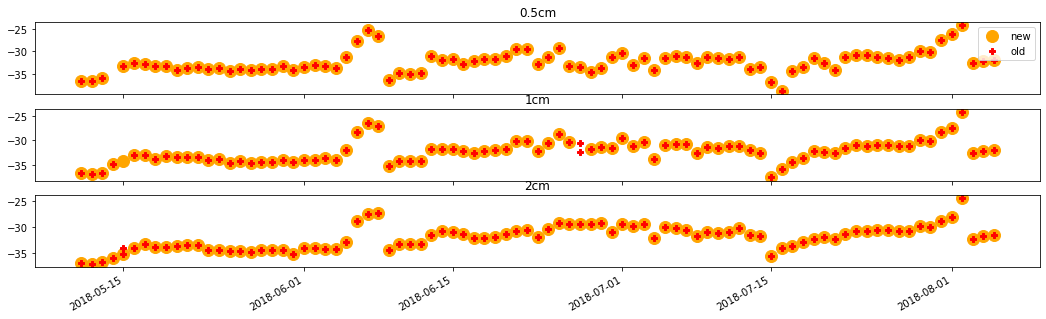

In [34]:
# CONTROL AFTER I REPROCESSED THE LOADING.. ONLY MINOR CHANGES IN THE BEGINNING
# THIS PLOT CAN NOT BE REPRODUCED SINCE I DELETED THE OLD DATAFILES
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(18,5))
ax1.plot(dfST_05.d18O,c='orange',Marker='o',ls='',label='new',Markersize=12)
ax1.plot(dfST_05old.d18O,c='r',Marker='P',ls='',label='old')
ax1.set_title('0.5cm')

ax2.plot(dfST_1.d18O,c='orange',Marker='o',ls='',label='new',Markersize=12)
ax2.plot(dfST_1old.d18O,c='r',Marker='P',ls='',label='old')
ax2.set_title('1cm')

ax3.plot(dfST_2.d18O,c='orange',Marker='o',ls='',label='new',Markersize=12)
ax3.plot(dfST_2old.d18O,c='r',Marker='P',ls='',label='old')
ax3.set_title('2cm')

ax1.legend()
fig.autofmt_xdate()

# calculate day to day variability for comparison with model

In [18]:
dfSTil=pd.read_csv('/Users/swa048/forServer/Snow/Isotopes/2018/data_measuredsamples/ST/ST2018_individuallayers.txt',index_col=0,parse_dates=True,na_values=['NAN'])
dfSTil=dfSTil.loc[:, dfSTil.dtypes == np.float64]
weather=dfweather.loc[dfSTil.index[0]:dfSTil.index[-1],:]

dfDdS_all=(dfSTil-dfSTil.shift(periods=1, freq="D")[:-1])

# only look at values without precipitation
dfSTil_nosnow=dfSTil[weather.Snowfall==0.0] #only if both days today and yesterday were without snow can I assume that there has not been precipitation influences

#only without precipitation influences
# shift only adds a day to index, but does not change anything else in the dataframe.. so what used to be 27.july is then 28.july--- and "minus" with dataframes will always work on the timeindex (so. 28.july-28.july)
#dataframe Delta delta S
# UPDATE 09.May 2021: Ich habs nochmal überprüft und was ich mache ergibt sinn. ziehe nur die Tage ab an denen ich mir sicher bin dass ich keine snowfall influences habe..
dfDdS=(dfSTil_nosnow-dfSTil_nosnow.shift(periods=1, freq="D")[:-1]) # observed changes with index indicating "compared to the day before", or in other words... today minus yesterday value.. 

dfDdS=dfDdS.reindex(pd.date_range(dfSTil.index[0],dfSTil.index[-1],freq='1D')) #each day should be represented, fill with NaN

# the 1cm and 5cm observations..including dex
with open('/Users/swa048/Documents/OneDrive/Dokumente/EC/Isoflux/snowiso_model/EGRIP2018_DeltadeltaS.pkl', 'wb') as f:
    pickle.dump(dfDdS, f)



dtype('float64')

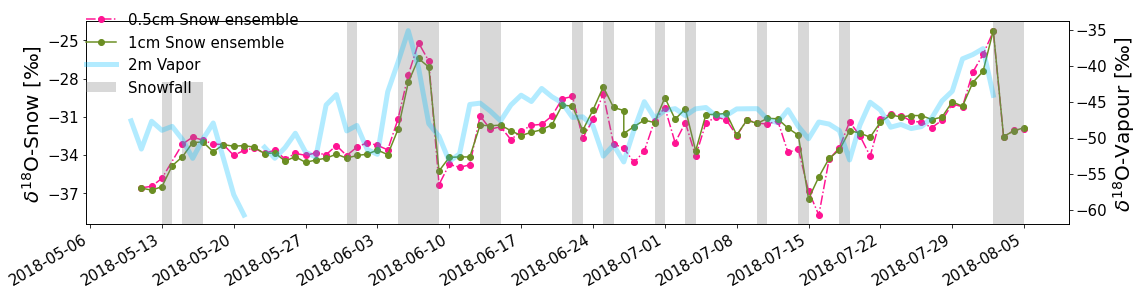

In [22]:
# plot the ST 2018 data

import matplotlib.dates as mdates

weekloc = mdates.WeekdayLocator(byweekday=mdates.SU, interval=1)
fig,ax,axi=plot1(figsize=(16,4))

axi.plot(df2m_d.d18O,color='deepskyblue',label='2m Vapor',linewidth=5,alpha=0.3)
axi.set_yticks(np.arange(-60,-30,5))
ax.plot(dfST_05.d18O,Marker='o',color='deeppink',LineStyle='-.',label='0.5cm Snow ensemble')
ax.plot(dfST_1.d18O,Marker='o',color='olivedrab',label='1cm Snow ensemble')
#ax.plot(dfST_2.d18O,Marker='o',color='limegreen',label='2cm Snow ensemble')
ax.set_yticks(np.arange(-37,-22,3))

#ax.plot(dfPRECIP.d18O,marker=u'$\u2744$',color='blue',label='fresh Snow',MarkerSize=12,LineStyle='',alpha=0.5) # 22a2


for day in weather[weather.Snowfall==1].index:
    print
    #ax.axvline(x=day,color='lightgrey',alpha=1,LineWidth=2)
    if day==pd.to_datetime('2018-08-02'):
        axi.axvspan(day,day+dt.timedelta(days=1),color='grey',alpha=0.3,lw=0,label='Snowfall')
    elif (day==pd.to_datetime('2018-05-13'))|(day==pd.to_datetime('2018-05-15'))|(day==pd.to_datetime('2018-05-16')):
        axi.axvspan(day,day+dt.timedelta(days=1),ymax=0.7,color='grey',alpha=0.3,lw=0)
    else:
        axi.axvspan(day,day+dt.timedelta(days=1),color='grey',alpha=0.3,lw=0)
#ax.axvspan(pd.to_datetime('2019-05-28'),pd.to_datetime('2019-06-03'),color='lightseagreen',alpha=0.4)
#ax.axvspan(pd.to_datetime('2019-06-21'),pd.to_datetime('2019-06-25'),color='lightseagreen',alpha=0.4)
#ax.axvspan(pd.to_datetime('2019-07-15'),pd.to_datetime('2019-07-21'),color='lightseagreen',alpha=0.4)


#ax.set_title(u'EGRIP18 ST $\delta^{18}$O',fontsize=20)
#fig.legend(fontsize=15,loc='upper center')
#fig.legend(fontsize=15,bbox_to_anchor=(1,0), loc="upper left",  bbox_transform=fig.transFigure)
#fig.legend(fontsize=15,bbox_to_anchor=[0.7, 0.26], loc='center',  bbox_transform=fig.transFigure)
fig.legend(fontsize=15,bbox_to_anchor=[0.17, 0.85], loc='center',  bbox_transform=fig.transFigure,frameon=False)#facecolor='white',framealpha=1)
#leg.get_frame().set_linewidth(0.0)

ax.xaxis.set_major_locator(weekloc)
ax.set_ylabel('$\delta^{18}$O-Snow [‰] ',fontsize=20)
axi.set_ylabel('$\delta^{18}$O-Vapour [‰] ',fontsize=20)
fig.autofmt_xdate()
fig.tight_layout()
#fig.savefig('/Users/swa048/forServer/Snow/Isotopes/2018/plots/ST2018.png',dpi=300)
fig.savefig('/Users/swa048/Documents/papersSW/Paper2/figures/ST2018_1cm.png',dpi=150)

In [44]:
,+
day

Timestamp('2018-08-04 00:00:00')